<a href="https://colab.research.google.com/github/ParsaFouladi/affinity-prediction/blob/main/protein_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gzip -d /content/drive/MyDrive/Brunel/Dissertation/PDBbind_v2020_refined.tar.gz

gzip: /content/drive/MyDrive/Brunel/Dissertation/PDBbind_v2020_refined.tar.gz: No such file or directory


In [1]:
!tar -xf /content/drive/MyDrive/Brunel/Dissertation/PDBbind_v2020_refined.tar

In [2]:
!ls /content/refined-set | wc -l

5318


In [ ]:
!cd /content/refined-set

In [ ]:
!ls /content/refined-set

10gs  1hms  1qbr  2cbv	2qwb  3arp  3hmp  3qaa	4ahr  4gr3  4o2b  4y79	5fs5  5nvw  6c2r  6hr2
184l  1hmt  1qbs  2cbz	2qwc  3arq  3hp9  3qbc	4ahs  4gr8  4o2c  4y8x	5fsc  5nvx  6c7q  6hrq
185l  1hn4  1qbt  2cc7	2qwd  3arw  3hs4  3qdd	4ahu  4gu6  4o2p  4yb5	5fsn  5nw0  6c7w  6hsh
186l  1hos  1qbu  2ccb	2qwe  3arx  3hu3  3qfd	4ai5  4gu9  4o3c  4ybk	5fso  5nw1  6c7x  6ht1
187l  1hp5  1qbv  2ccc	2qwf  3axz  3hub  3qfy	4aia  4gue  4o3f  4yc0	5fsx  5nw2  6c85  6htg
188l  1hpo  1qf0  2ce9	2qzr  3b1m  3huc  3qfz	4aj4  4gzp  4o61  4yes	5fsy  5nw7  6c9s  6hza
1a1e  1hps  1qf1  2cej	2r0h  3b24  3hv8  3qgw	4aje  4gzt  4o6w  4ygf	5ftg  5nwe  6c9v  6hzb
1a28  1hpv  1qf2  2cen	2r0z  3b25  3hvi  3qgy	4aji  4gzw  4o97  4yha	5fto  5nwi  6cbf  6hzy
1a30  1hpx  1qft  2ceq	2r1y  3b26  3hvj  3qkd	4ajl  4gzx  4o9v  4yhm	5fut  5nxg  6cbg  6i0z
1a4k  1hsh  1qhc  2cer	2r23  3b27  3hww  3qlm	4alx  4h3f  4o9w  4yho	5fyx  5nxi  6cdj  6i11
1a4r  1hsl  1qin  2ces	2r2m  3b2q  3hzk  3qox	4aoi  4h3g  4oag  4yk0	5g17  5nxo 

In [ ]:
!ls /content/refined-set/10gs

10gs_ligand.mol2  10gs_ligand.sdf  10gs_pocket.pdb  10gs_protein.pdb


In [3]:
!pip install biopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 14.0 MB/s eta 0:00:00


In [6]:
#try reading one file
from biopandas.pdb import PandasPdb
pl1 = PandasPdb().read_pdb('/content/refined-set/10gs/10gs_protein.pdb')

In [ ]:
pl1.df['ATOM']

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,PRO,,A,2,,...,31.242,3.064,39.284,1.0,39.90,,,N,NaN,35
1,ATOM,2,,CA,,PRO,,A,2,,...,31.195,2.392,37.963,1.0,31.96,,,C,NaN,36
2,ATOM,3,,HA,,PRO,,A,2,,...,32.081,2.579,37.357,1.0,0.00,,,H,NaN,37
3,ATOM,4,,C,,PRO,,A,2,,...,29.975,2.923,37.197,1.0,30.23,,,C,NaN,38
4,ATOM,5,,O,,PRO,,A,2,,...,29.727,4.132,37.181,1.0,27.03,,,O,NaN,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521,ATOM,6522,,OE1,,GLN,,B,209,,...,6.914,33.780,9.783,1.0,42.45,,,O,NaN,6557
6522,ATOM,6523,,NE2,,GLN,,B,209,,...,8.237,32.319,8.697,1.0,35.16,,,N,NaN,6558
6523,ATOM,6524,,1HE2,,GLN,,B,209,,...,8.933,33.054,8.458,1.0,0.00,,,H,NaN,6559
6524,ATOM,6525,,2HE2,,GLN,,B,209,,...,8.391,31.337,8.391,1.0,0.00,,,H,NaN,6560


In [ ]:
pl1.df['ATOM'].shape

(6526, 21)

In [ ]:
ppdb = PandasPdb().fetch_pdb('10gs')

In [ ]:
ppdb.df['ATOM'].shape

(3262, 21)

In [ ]:
ppdb.df['ATOM']

In [ ]:
# Extract the data frame containing the residues (ATOM records)
residues = pl1.df['ATOM']

# Get unique residues to avoid counting the same residue multiple times
unique_residues = residues[['chain_id', 'residue_number', 'residue_name']].drop_duplicates()

# Count the number of unique residues
num_residues = unique_residues.shape[0]

print(f"Number of residues in the PDB file: {num_residues}")

Number of residues in the PDB file: 416


After a minor analysis, we can see that we should use the files from pdbbind database and not the pdb database

In [4]:
import os
import re
print("Python Program to print list the files in a directory.")
Direc = '/content/refined-set'
print(f"Files in the directory: {Direc}")
folders = os.listdir(Direc)
# Filtering only the files.
folders = [f for f in folders if not os.path.isfile(Direc+'/'+f)]
print(len(folders))

Python Program to print list the files in a directory.
Files in the directory: /content/refined-set
5318


In [ ]:
print(folders[:10])

['3hs4', '2olb', '2v3d', '3hek', '5cc2', '1bn3', '5orv', '3hll', '1c5o', '5aan']


In [ ]:
protein_atom_numbers={}
folder_number=0
for folder in folders:
  Dir=f'/content/refined-set/{folder}'

  files = os.listdir(Dir)

  files= [f for f in files if (os.path.isfile(Dir+'/'+f)) and f.endswith('protein.pdb')]

  for file in files:
    pro=PandasPdb().read_pdb(f'{Dir}/{file}')
    protein_atom_numbers[f'{file}']=(pro.df['ATOM'].shape[0])
  if folder_number%100==0:
    print(f'{folder_number+1} is finished!')
  folder_number+=1


1 is finished!
101 is finished!
201 is finished!
301 is finished!
401 is finished!
501 is finished!
601 is finished!
701 is finished!
801 is finished!
901 is finished!
1001 is finished!
1101 is finished!
1201 is finished!
1301 is finished!
1401 is finished!
1501 is finished!
1601 is finished!
1701 is finished!
1801 is finished!
1901 is finished!
2001 is finished!
2101 is finished!
2201 is finished!
2301 is finished!
2401 is finished!
2501 is finished!
2601 is finished!
2701 is finished!
2801 is finished!
2901 is finished!
3001 is finished!
3101 is finished!
3201 is finished!
3301 is finished!
3401 is finished!
3501 is finished!
3601 is finished!
3701 is finished!
3801 is finished!
3901 is finished!
4001 is finished!
4101 is finished!
4201 is finished!
4301 is finished!
4401 is finished!
4501 is finished!
4601 is finished!
4701 is finished!
4801 is finished!
4901 is finished!
5001 is finished!
5101 is finished!
5201 is finished!
5301 is finished!


In [ ]:
protein_atom_numbers

{'1t7d_protein.pdb': 3270,
 '3zsx_protein.pdb': 4632,
 '6md8_protein.pdb': 2416,
 '2b9a_protein.pdb': 6788,
 '6g3v_protein.pdb': 2432,
 '3qps_protein.pdb': 6618,
 '3v78_protein.pdb': 5304,
 '3a1e_protein.pdb': 8241,
 '5fnd_protein.pdb': 3968,
 '5jvi_protein.pdb': 2954,
 '3k4d_protein.pdb': 37276,
 '5ldm_protein.pdb': 1717,
 '4gqq_protein.pdb': 7639,
 '6ayq_protein.pdb': 4158,
 '4up5_protein.pdb': 776,
 '2bo4_protein.pdb': 24640,
 '3wtm_protein.pdb': 4062,
 '4dju_protein.pdb': 6026,
 '2xyt_protein.pdb': 16030,
 '4qgi_protein.pdb': 1850,
 '2zn7_protein.pdb': 4801,
 '5lz4_protein.pdb': 3626,
 '3qqa_protein.pdb': 6568,
 '5e2r_protein.pdb': 2516,
 '5yyf_protein.pdb': 1400,
 '6np4_protein.pdb': 2450,
 '5e2p_protein.pdb': 2262,
 '3vf7_protein.pdb': 3122,
 '2qwb_protein.pdb': 23828,
 '5fdc_protein.pdb': 2495,
 '1g46_protein.pdb': 4054,
 '4afg_protein.pdb': 16984,
 '1utl_protein.pdb': 3235,
 '2xhm_protein.pdb': 9532,
 '6g5u_protein.pdb': 2488,
 '4og3_protein.pdb': 4389,
 '1fm9_protein.pdb': 817

In [ ]:
for pro in protein_atom_numbers:
  if protein_atom_numbers[pro]>70000:
    print(pro)

2f2h_protein.pdb


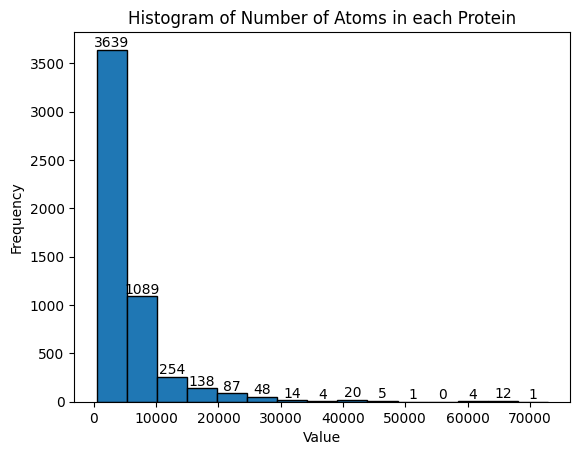

In [ ]:
import matplotlib.pyplot as plt


# Create histogram
counts, bins, patches = plt.hist(protein_atom_numbers, bins=15, edgecolor='black')

# Add title and labels
plt.title('Histogram of Number of Atoms in each Protein')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add frequency labels on top of each bin
for count, x in zip(counts, bins):
    plt.text(x + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

# Show the plot
plt.show()

In [7]:
protein_residue_numbers={}
folder_number=0
for folder in folders:
  Dir=f'/content/refined-set/{folder}'

  files = os.listdir(Dir)

  files= [f for f in files if (os.path.isfile(Dir+'/'+f)) and f.endswith('protein.pdb')]

  for file in files:
    pro=PandasPdb().read_pdb(f'{Dir}/{file}')
    protein_residue_numbers[f'{file}']=pro.df['ATOM'][['chain_id', 'residue_number', 'residue_name']].drop_duplicates().shape[0]# Get unique residues to avoid counting the same residue multiple times

# Count the number of unique residues
#num_residues = unique_residues.shape[0]
  if folder_number%100==0:
    print(f'{folder_number+1} is finished!')
  folder_number+=1

1 is finished!
101 is finished!
201 is finished!
301 is finished!
401 is finished!
501 is finished!
601 is finished!
701 is finished!
801 is finished!
901 is finished!
1001 is finished!
1101 is finished!
1201 is finished!
1301 is finished!
1401 is finished!
1501 is finished!
1601 is finished!
1701 is finished!
1801 is finished!
1901 is finished!
2001 is finished!
2101 is finished!
2201 is finished!
2301 is finished!
2401 is finished!
2501 is finished!
2601 is finished!
2701 is finished!
2801 is finished!
2901 is finished!
3001 is finished!
3101 is finished!
3201 is finished!
3301 is finished!
3401 is finished!
3501 is finished!
3601 is finished!
3701 is finished!
3801 is finished!
3901 is finished!
4001 is finished!
4101 is finished!
4201 is finished!
4301 is finished!
4401 is finished!
4501 is finished!
4601 is finished!
4701 is finished!
4801 is finished!
4901 is finished!
5001 is finished!
5101 is finished!
5201 is finished!
5301 is finished!


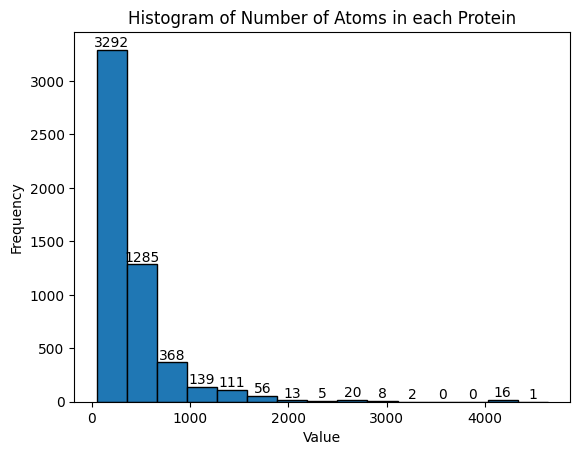

In [ ]:
import matplotlib.pyplot as plt


# Create histogram
counts, bins, patches = plt.hist(protein_residue_numbers.values(), bins=15, edgecolor='black')

# Add title and labels
plt.title('Histogram of Number of Atoms in each Protein')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add frequency labels on top of each bin
for count, x in zip(counts, bins):
    plt.text(x + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
protein_residue_numbers

{'3hs4_protein.pdb': 257,
 '2olb_protein.pdb': 517,
 '2v3d_protein.pdb': 496,
 '3hek_protein.pdb': 443,
 '5cc2_protein.pdb': 256,
 '1bn3_protein.pdb': 257,
 '5orv_protein.pdb': 264,
 '3hll_protein.pdb': 337,
 '1c5o_protein.pdb': 281,
 '5aan_protein.pdb': 183,
 '4b5t_protein.pdb': 1506,
 '2xj2_protein.pdb': 273,
 '3s72_protein.pdb': 257,
 '5ota_protein.pdb': 254,
 '5fsn_protein.pdb': 154,
 '4w9i_protein.pdb': 327,
 '5dgu_protein.pdb': 198,
 '2r38_protein.pdb': 198,
 '3qkd_protein.pdb': 140,
 '5vsj_protein.pdb': 1298,
 '4exs_protein.pdb': 231,
 '3k5x_protein.pdb': 391,
 '6q4g_protein.pdb': 282,
 '2j4g_protein.pdb': 586,
 '4ufl_protein.pdb': 641,
 '5fcz_protein.pdb': 499,
 '2pvh_protein.pdb': 327,
 '4z1j_protein.pdb': 258,
 '1w4o_protein.pdb': 124,
 '1drv_protein.pdb': 1080,
 '2wvt_protein.pdb': 877,
 '4xaq_protein.pdb': 443,
 '3b50_protein.pdb': 310,
 '6eq7_protein.pdb': 154,
 '6dzx_protein.pdb': 240,
 '6mdu_protein.pdb': 229,
 '1hlk_protein.pdb': 227,
 '4ht2_protein.pdb': 261,
 '4djo_pr

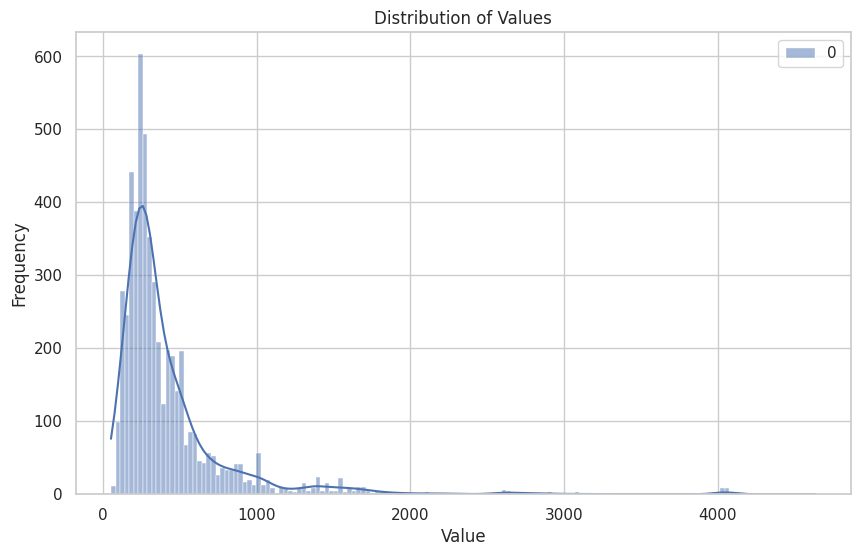

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Plot the distribution using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(protein_residue_numbers.values(), kde=True)

# Adding titles and labels
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


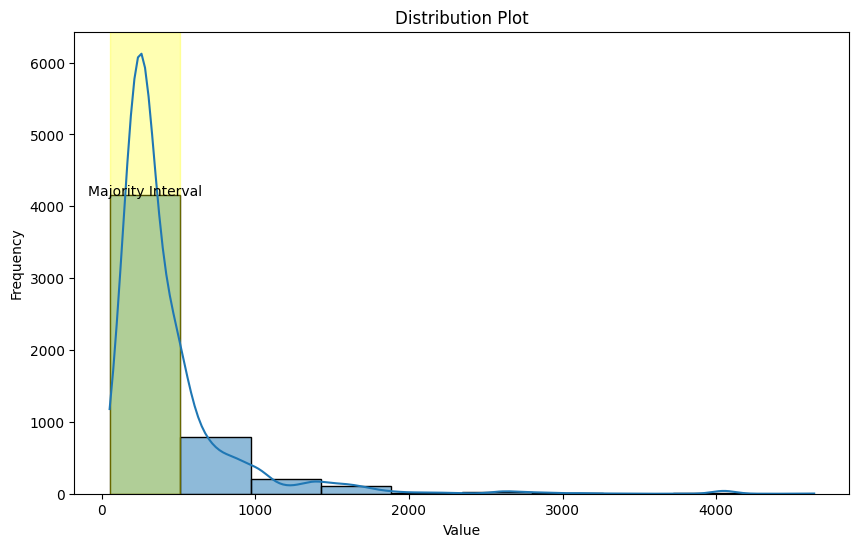

The majority of the data lies in the interval: (52.0, 510.6)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample list of values
values = list(protein_residue_numbers.values())

# Create the distribution plot
plt.figure(figsize=(10, 6))
histplot = sns.histplot(values, kde=True, bins=10)

# Set plot title and labels
plt.title('Distribution Plot')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Calculate the interval with the highest frequency
counts, bin_edges = np.histogram(values, bins=10)
max_count_index = np.argmax(counts)
interval = (bin_edges[max_count_index], bin_edges[max_count_index + 1])

# Annotate the interval on the plot
plt.axvspan(interval[0], interval[1], color='yellow', alpha=0.3)
plt.text((interval[0] + interval[1]) / 2, max(counts), 'Majority Interval',
         horizontalalignment='center', color='black')

# Show the plot
plt.show()

# Print the interval
print(f"The majority of the data lies in the interval: {interval}")


<Axes: >

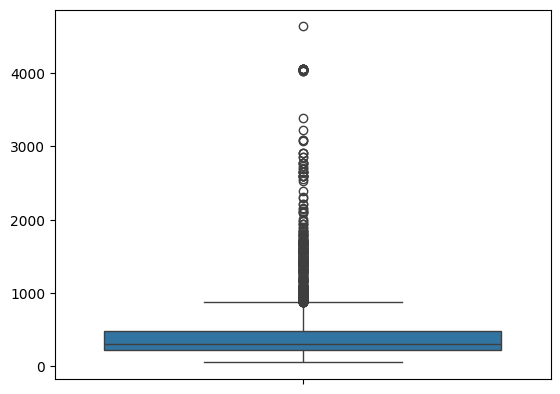

In [10]:
sns.boxplot(values)

In [11]:
len([x for x in values if x>1000])

356

In [ ]:
min(values)

52

In [15]:
values_cleaned=[x for x in values if x<1000]

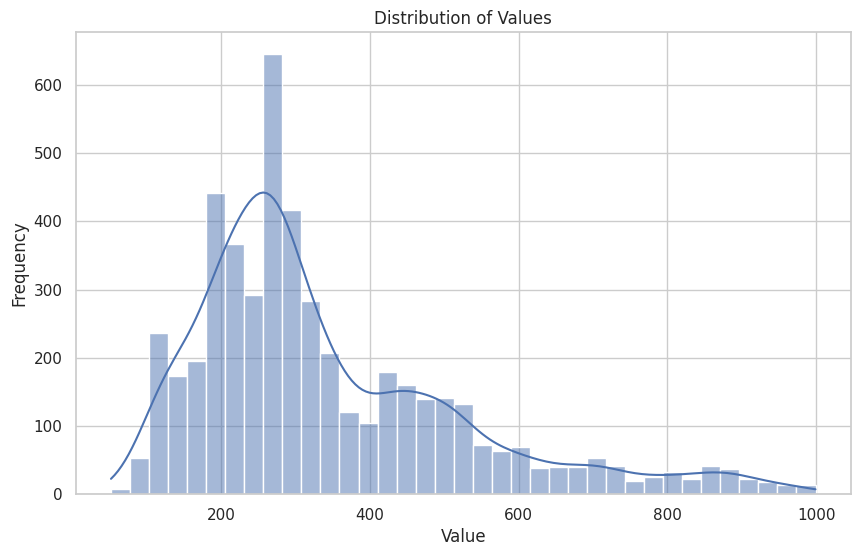

In [16]:
# Plot the distribution using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(values_cleaned, kde=True)

# Adding titles and labels
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [17]:
import numpy as np



# Finding the 90 percentile
x = np.percentile(values_cleaned, 90)
print(x)

601.0


In [19]:
np.median(values_cleaned)

286.0

In [ ]:
np.mean(values_cleaned)